In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


csv_files = glob.glob('data/movies_*.csv')

dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)
    
movie = pd.concat(dfs)
movie = movie.drop_duplicates().reset_index(drop=True)

## Data Cleaning

### TODO:
* Figure out what to do with list columns like Country, Language, Writer, etc.

In [2]:
def extract_rotten_rating(rating):
    try:
        ratings = json.loads(rating.replace("'", '"'))
        for rating in ratings:
            if rating['Source'] == 'Rotten Tomatoes':
                return float(rating['Value'].replace('%', ''))
    except:
        return np.nan

In [3]:
# Custom function to extract rotten tomatoes ratings
movie['Ratings'] = movie['Ratings'].apply(extract_rotten_rating)

# Convert numeric columns stored as strings
movie['Runtime'] = pd.to_numeric(movie['Runtime'].str.split(' ').str[0])
movie['BoxOffice'] = pd.to_numeric(movie['BoxOffice'].str.replace(r'[\$,]', ''))
movie['imdbVotes'] = pd.to_numeric(movie['imdbVotes'].str.replace(',', ''))

# Convert datetime columns stored as strings
movie['Released'] = pd.to_datetime(movie['Released'])
movie['added_to_netflix'] = pd.to_datetime(movie['added_to_netflix'])

# Extract numbers from Awards columns
movie['award_wins'] = movie['Awards'].str.extract(r'(\d) win').astype(float)
movie['award_noms'] = movie['Awards'].str.extract(r'(\d) nomination').astype(float)
movie['oscar_wins'] = movie['Awards'].str.extract(r'Nominated for (\d) Oscar').astype(float)

In [4]:
drop_columns = ['Poster', 'flixable_url', 'Response', 
                'Awards', 'Rated', 'imdbID', 'DVD', 'Website']

movie = movie.drop(columns=drop_columns)

## EDA

### TODO:
* More

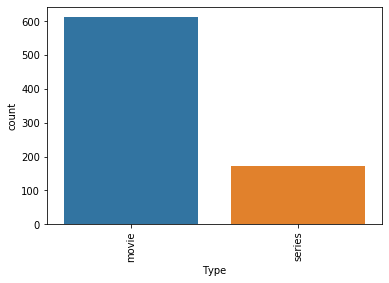

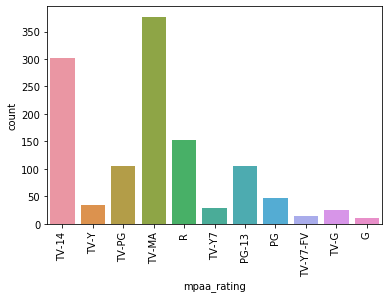

In [7]:
plot_cols = ['Type', 'mpaa_rating']
for plot_col in plot_cols:
    fig = sns.countplot(plot_col, data=movie)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()